![Alt Text](https://raw.githubusercontent.com/msfasha/307307-BI-Methods/main/20242-NLP-LLM/images/header.png)

<div style="display: flex; justify-content: flex-start; align-items: center;">
   <a href="https://github.com/msfasha/307307-BI-Methods/blob/main/20242-NLP-LLM/Part%202%20-%20Introduction%20to%20NNs%20and%20Word%20Embeddings/1-Introduction%20Neural%20Networks%20and%20Word%20Embeddings.ipynb" target="_parent"><img 
   src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</div>

## The Perceptron

### Implement the Perceptron using scikit-learn library

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

# Training data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize and train Perceptron
model = Perceptron(max_iter=100, eta0=0.1, random_state=42)
model.fit(X, y)

# Results
print("Weights:", model.coef_)
print("Bias:", model.intercept_)
print("Predictions:", model.predict(X))

Weights: [[0.2 0.2]]
Bias: [-0.2]
Predictions: [0 0 0 1]


Note: In the scikit-learn Perceptron, the step function (also called the activation function) is a hard threshold function, and it's built-in.<br>

```Python
prediction = 1 if output >= 0 else 0

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods/main/20242-NLP-LLM/images/perceptron.png" alt="Simple Perceptron" width="500"/>
</div>

---

## The Mulit-Layer Perceptron - MLP

### Solving the XOR Problem using a Neural Network

This code demonstrates how to build and train a simple neural network from scratch using NumPy to learn the XOR logic gate.

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Define MLP with 1 hidden layer of 2 neurons (minimal config for XOR)
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh',
                    solver='adam', learning_rate_init=0.01,
                    max_iter=10000, random_state=42)

# Train the model
mlp.fit(X, y)

# Make predictions
predictions = mlp.predict(X)

print("Predictions:\n", predictions)
print("\nWeights (input to hidden):\n", "[ w11 , w12 ]\n[ w21 , w22 ]\n", mlp.coefs_[0])
print("\nBias hidden:\n", mlp.intercepts_[0])
print("\nWeights (hidden to output):\n", mlp.coefs_[1])
print("\nBias output:\n", mlp.intercepts_[1])


Predictions:
 [0 1 1 0]

Weights (input to hidden):
 [ w11 , w12 ]
[ w21 , w22 ]
 [[ 2.7144501   3.27401218]
 [-2.73418453 -3.17014048]]

Bias hidden:
 [ 1.21994174 -1.63451199]

Weights (hidden to output):
 [[-4.37775211]
 [ 4.46553876]]

Bias output:
 [3.61855675]


<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307307-BI-Methods/main/20242-NLP-LLM/images/mlp.png" alt="Multi Layer Perceptron" width="600"/>
</div>

---

### Testing Fake Embeddings

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Fake word vectors (3D for simplicity)
word_vectors = {
  "king": np.array([0.8, 0.65, 0.1]),
   "queen": np.array([0.78, 0.66, 0.12]), 
   "man": np.array([0.9, 0.1, 0.1]),
   "woman": np.array([0.88, 0.12, 0.12]),
  "apple": np.array([0.1, 0.8, 0.9]),
}

def similarity(w1, w2):
	return cosine_similarity([word_vectors[w1]], [word_vectors[w2]])[0][0]

print("Similarity(king, queen):", similarity("king", "queen"))
print("Similarity(man, woman):", similarity("man", "woman"))
print("Similarity(king, apple):", similarity("king", "apple"))

Similarity(king, queen): 0.9995995265529728
Similarity(man, woman): 0.999399810286
Similarity(king, apple): 0.5514092058274782


#### Convert data into 2-Dimensions and Visualize using a scatter plot

We can use the PCA technique to reduce the dimensions of the vectors and concentrate on the most important dimensions e.g. 2 dimensions out of 10.

The we can use the resulting 2-dimensions in visualizing our data in a 2-D plot i.e. Scatter Plot

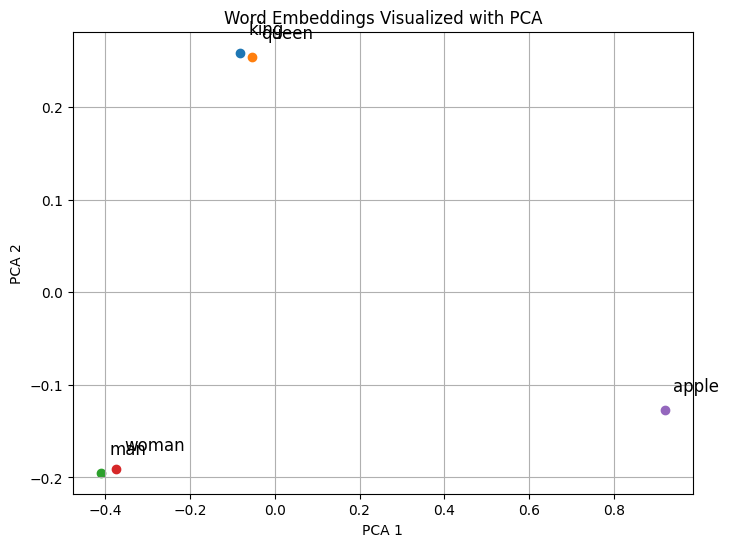

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA 

# Prepare data
words = list(word_vectors.keys())
vectors = np.array(list(word_vectors.values())) # values of the dictionary needs to be converted to a numpy array

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))
for i, word in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)

plt.title("Word Embeddings Visualized with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

---

## Building Word Embeddings from Scratch
We can build word embeddings from sratch using a corpus of our own and using gensim library to build Word2Vec representations.

First, we need to install gensim library

In [ ]:
# This code can run on local machine
#%pip install gensim

> If faced with compatibility issues in Google Colab, run the code below

In [ ]:
# This code is used to fix the issue with gensim version on Google Colab
%pip uninstall -y gensim
%pip install --force-reinstall "scipy<1.11" "gensim==4.3.2"

#### Example 1 - Simple Tokenized Corpus

In [ ]:
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ['data', 'science', 'is', 'fun'],
    ['machine', 'learning', 'is', 'powerful'],
    ['data', 'and', 'learning', 'are', 'related']
]

# Train the model
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=2)

# Access the embedding for a word
print("Vector for 'data':\n", model.wv['data'])

# Find similar words
print("Words similar to 'data':", model.wv.most_similar('data'))

Vector for 'data':
 [-0.01723938  0.00733148  0.01037977  0.01148388  0.01493384 -0.01233535
  0.00221123  0.01209456 -0.0056801  -0.01234705 -0.00082045 -0.0167379
 -0.01120002  0.01420908  0.00670508  0.01445134  0.01360049  0.01506148
 -0.00757831 -0.00112361  0.00469675 -0.00903806  0.01677746 -0.01971633
  0.01352928  0.00582883 -0.00986566  0.00879638 -0.00347915  0.01342277
  0.0199297  -0.00872489 -0.00119868 -0.01139127  0.00770164  0.00557325
  0.01378215  0.01220219  0.01907699  0.01854683  0.01579614 -0.01397901
 -0.01831173 -0.00071151 -0.00619968  0.01578863  0.01187715 -0.00309133
  0.00302193  0.00358008]
Words similar to 'data': [('are', 0.16563551127910614), ('fun', 0.13940520584583282), ('learning', 0.1267007291316986), ('powerful', 0.08872982114553452), ('is', 0.011071977205574512), ('and', -0.027849990874528885), ('science', -0.0372748002409935), ('related', -0.15515568852424622), ('machine', -0.2187294214963913)]


### Example 2 - Build Word2Vec based on an Un-Tokenized Corpus

The code below uses the gensim library to build word embeddings using Word2Vec models from scratch.<br>
It uses a text corpus to learn word similarities.

First, we need to install nltk to tokenize our text.

In [ ]:
%pip install nltk

import nltk
nltk.download('punkt_tab')

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\me\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\me\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Sample corpus
sentences = [
    "Large language models are transforming business applications",
    "Natural language processing helps computers understand human language",
    "Word embeddings capture semantic relationships between words",
    "Neural networks learn distributed representations of words",
    "Businesses use language models for various applications",
    "Customer service can be improved with language technology",
    "Modern language models require significant computing resources",
    "Language models can generate human-like text for businesses"
]

# Tokenize the sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,    # Embedding dimension
    window=5,           # Context window size
    min_count=1,        # Minimum word frequency
    workers=4           # Number of threads
)

# Save the model
model.save("word2vec.model")


Vector for 'business' (first 10 dimensions):
[ 0.00816812 -0.00444303  0.00898543  0.00825366 -0.00443522  0.00030311
  0.00427449 -0.00392632 -0.00555997 -0.00651232]
Words most similar to 'language':
natural: 0.2196
between: 0.2167
resources: 0.1955
distributed: 0.1696
significant: 0.1522


#### Display vector for a specific word

In [ ]:
word_vector = model.wv["business"]
print(f"\nVector for 'business' (first 10 dimensions):\n{word_vector[:10]}") # Print first 10 dimensions


Vector for 'business' (first 10 dimensions):
[ 0.00816812 -0.00444303  0.00898543  0.00825366 -0.00443522  0.00030311
  0.00427449 -0.00392632 -0.00555997 -0.00651232]


#### Find the most similar words to "language"

In [19]:
similar_words = model.wv.most_similar("language", topn=5)
print("Words most similar to 'language':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Words most similar to 'language':
natural: 0.2196
between: 0.2167
resources: 0.1955
distributed: 0.1696
significant: 0.1522


#### Word Analogies

The following code performs a **word analogy** task using a trained Word2Vec model:

```python
analogy_result = model.wv.most_similar(
    positive=["business", "language"],
    negative=["models"],
    topn=3
)
```

In this operation:

- Words in the `positive` list ("business" and "language") are **added** together in the vector space.
- Words in the `negative` list ("models") are **subtracted** from the combined meaning.
- The method then searches for the **top 3 words** (`topn=3`) whose vectors are **most similar** to the resulting vector.

Mathematically, this is equivalent to:

```
result_vector = vector("business") + vector("language") - vector("models")
```

The function `most_similar()` uses **cosine similarity** to find the words whose embeddings are closest to this resulting vector.

This type of operation allows Word2Vec to capture **semantic relationships** between words. A classic example is:

```
vector("king") - vector("man") + vector("woman") ≈ vector("queen")
```

Thus, the analogy result provides words that are semantically similar to the combination of "business" and "language," but unrelated to "models."

In [18]:
# Word analogies
analogy_result = model.wv.most_similar(
    positive=["business", "language"],
    negative=["models"],
    topn=3
)
print("\nAnalogy results:")
for word, similarity in analogy_result:
    print(f"{word}: {similarity:.4f}")


Analogy results:
neural: 0.2595
natural: 0.2004
resources: 0.1899


---

#### Use Real Embeddings - Gensim library

For this example, we will use the `word2vec-google-news-300` model. <br>
The `word2vec-google-news-300` model is a **pre-trained Word2Vec model** created by Google.  
It has the following characteristics:

- **Training data**: Trained on approximately **100 billion words** from the **Google News** dataset.
- **Vector size**: Each word is represented as a **300-dimensional** vector.
- **Vocabulary size**: It contains **about 3 million unique words and phrases**.
- **Training method**: It uses the **skip-gram** Word2Vec architecture to predict context words given a target word.
- It's a little **heavy**, about 1.5 GB, so it’s good to know the best way to handle it.

This model captures a wide range of **semantic** and **syntactic** relationships between words.  
Because it is trained on a large and diverse corpus, it is widely used for many natural language processing (NLP) tasks where high-quality word embeddings are required.

In [22]:
import gensim.downloader as api

# Load the pre-trained Word2Vec model
word2vec_model = api.load("word2vec-google-news-300")

# Find words similar to 'computer'
similar_words = word2vec_model.most_similar('computer', topn=5)
print("Words similar to 'computer':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

# Example of a word analogy: king - man + woman = ?
analogy_result = word2vec_model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("\nResult of analogy (king - man + woman):")
for word, similarity in analogy_result:
    print(f"{word}: {similarity:.4f}")

# Find odd one out
odd_one_out = word2vec_model.doesnt_match(["breakfast", "lunch", "dinner", "car"])
print("\nOdd one out in ['breakfast', 'lunch', 'dinner', 'car']:", odd_one_out)

# Compute similarity between two words
similarity_score = word2vec_model.similarity('coffee', 'tea')
print(f"\nSimilarity between 'coffee' and 'tea': {similarity_score:.4f}")

Words similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Result of analogy (king - man + woman):
queen: 0.7118

Odd one out in ['breakfast', 'lunch', 'dinner', 'car']: car

Similarity between 'coffee' and 'tea': 0.5635


#### Use Real Embeddings - Spacy library

Download spacy and the required libraries

In [ ]:
%pip install spacy
!python -m spacy download en_core_web_md

  Using cached numpy-2.2.5-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\me\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~~mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\me\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


You should consider upgrading via the 'c:\Users\me\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [23]:
import spacy
nlp = spacy.load("en_core_web_md")

word1 = nlp("king")
word2 = nlp("queen")
print("Similarity:", word1.similarity(word2))

Similarity: 0.38253095611315674
